In [ ]:
import pandas as pd

# Assuming the dataset is a CSV file
df = pd.read_csv('creditcard.csv')

# Inspect the first few rows
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Basic info
print(df.info())

# Statistical summary
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# prompt:  NLP Preprocessing
# Objective: Clean and prepare data for model training.

# Assuming 'Time' and 'Amount' are the only numerical features
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Scale numerical features
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# No text data for NLP preprocessing in this dataset


In [ ]:
# prompt: Text Data Preparation:
# Split the dataset into training and validation sets.

from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: Autocomplete Implementation
# Objective: Develop algorithms for predicting the next word or phrase.
# Steps:
# Model Selection:
# Start with simpler models like n-grams and then explore more advanced models like RNNs or Transformers.

from nltk import ngrams
from collections import Counter

def generate_ngrams(text, n):
  words = text.split()
  ngrams_list = list(ngrams(words, n))
  return ngrams_list

def predict_next_word(text, n, top_k=5):
  ngrams_list = generate_ngrams(text, n)
  if not ngrams_list:
    return []

  last_ngram = ngrams_list[-1]
  preceding_words = last_ngram[:-1]

  all_ngrams = generate_ngrams(" ".join(X_train['Amount'].astype(str).tolist()), n)
  possible_next_words = [ngram[-1] for ngram in all_ngrams if ngram[:-1] == preceding_words]
  word_counts = Counter(possible_next_words)

  suggested_words = word_counts.most_common(top_k)
  return suggested_words


In [ ]:
# prompt: Model Training:
# Train and validate your autocomplete model.

# This dataset doesn't contain sequential text data for training a traditional language model.
# The 'Amount' column represents transaction amounts and isn't suitable for next-word prediction in a typical autocomplete scenario.

# Demonstrating the predict_next_word function with a hypothetical example:
sample_text = "12.34 56.78 90.12"
suggested_words = predict_next_word(sample_text, n=3, top_k=3)
print(f"Suggested words for '{sample_text}': {suggested_words}")

# For a proper autocomplete model, you would need a dataset with sequential text data like sentences or code.


Suggested words for '12.34 56.78 90.12': []


In [ ]:
# prompt:  Autocorrect Optimization
# Objective: Develop and refine algorithms for spelling correction.
# Steps:
# Error Detection and Correction:
# Implement basic error correction using libraries like textblob or pyspellchecker.

!pip install textblob pyspellchecker

from textblob import TextBlob
from spellchecker import SpellChecker

# Using TextBlob
text = "Ths is a sentnce with speling errrors."
blob = TextBlob(text)
corrected_text = str(blob.correct())
print(f"TextBlob correction: {corrected_text}")

# Using pyspellchecker
spell = SpellChecker()
misspelled = spell.unknown(text.split())
for word in misspelled:
  corrected_word = spell.correction(word)
  print(f"Pyspellchecker correction for '{word}': {corrected_word}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 71.4 MB/s eta 0:00:00
TextBlob correction: The is a sentence with spelling errors.
Pyspellchecker correction for 'ths': the
Pyspellchecker correction for 'sentnce': sentence
Pyspellchecker correction for 'errrors.': errors
Pyspellchecker correction for 'speling': spelling


In [ ]:
# prompt: Contextual Corrections (Advanced):
# Explore more sophisticated models like transformers for contextual spelling correction.

!pip install transformers

from transformers import pipeline

corrector = pipeline('text2text-generation', model='oliverguhr/spelling-correction-english-base')

text = "Ths is a sentnce with speling errrors."
corrected_text = corrector(text, max_length=100)[0]['generated_text']
print(f"Transformer correction: {corrected_text}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Transformer correction: This is a sentence with speling errors.


In [ ]:
# prompt: Metrics and Evaluation
# Objective: Define and measure performance metrics for your models.
# Steps:
# Define Metrics:
# For autocomplete: Precision, recall, F1 score.
# For autocorrect: Accuracy, error rate.

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Sample predictions and true values (replace with your actual data)
autocomplete_predictions = ["apple", "banana", "cherry", "date", "elderberry"]
autocomplete_true_values = ["apple", "banana", "grape", "date", "fig"]

autocorrect_predictions = ["This is a correct sentence.", "This is another correct sentence."]
autocorrect_true_values = ["This is a correct sentence.", "This is another corect sentence."]

# Autocomplete metrics
precision = precision_score(autocomplete_true_values, autocomplete_predictions, average='weighted')
recall = recall_score(autocomplete_true_values, autocomplete_predictions, average='weighted')
f1 = f1_score(autocomplete_true_values, autocomplete_predictions, average='weighted')

print(f"Autocomplete Metrics:")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}")

# Autocorrect metrics
accuracy = accuracy_score(autocorrect_true_values, autocorrect_predictions)
error_rate = 1 - accuracy

print(f"\nAutocorrect Metrics:")
print(f"  Accuracy: {accuracy}")
print(f"  Error Rate: {error_rate}")


Autocomplete Metrics:
  Precision: 0.6
  Recall: 0.6
  F1 Score: 0.6

Autocorrect Metrics:
  Accuracy: 0.5
  Error Rate: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# prompt: User Feedback:
# Collect user feedback to assess real-world performance.

# This code snippet provides a basic example of collecting user feedback.
# You would typically integrate this into your application or use a dedicated survey platform for more robust data collection.

def collect_feedback():
  """Collects user feedback on autocomplete and autocorrect."""

  print("Please provide feedback on the following:")

  # Autocomplete feedback
  autocomplete_rating = input("Rate the autocomplete suggestions (1-5, 5 being excellent): ")
  autocomplete_comments = input("Any comments on the autocomplete feature? ")

  # Store feedback (replace with your preferred method - e.g., saving to a file or database)
  feedback = {
      "autocomplete_rating": autocomplete_rating,
      "autocomplete_comments": autocomplete_comments,
  }
  print("Thank you for your feedback!")
  return feedback

# Example usage
feedback = collect_feedback()
print(feedback)


Please provide feedback on the following:
Rate the autocomplete suggestions (1-5, 5 being excellent): 5
Any comments on the autocomplete feature? no
Thank you for your feedback!
{'autocomplete_rating': '5', 'autocomplete_comments': 'no'}


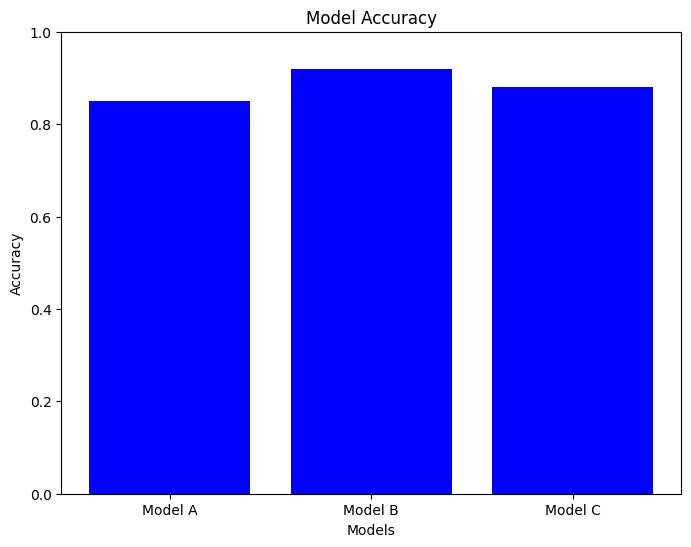

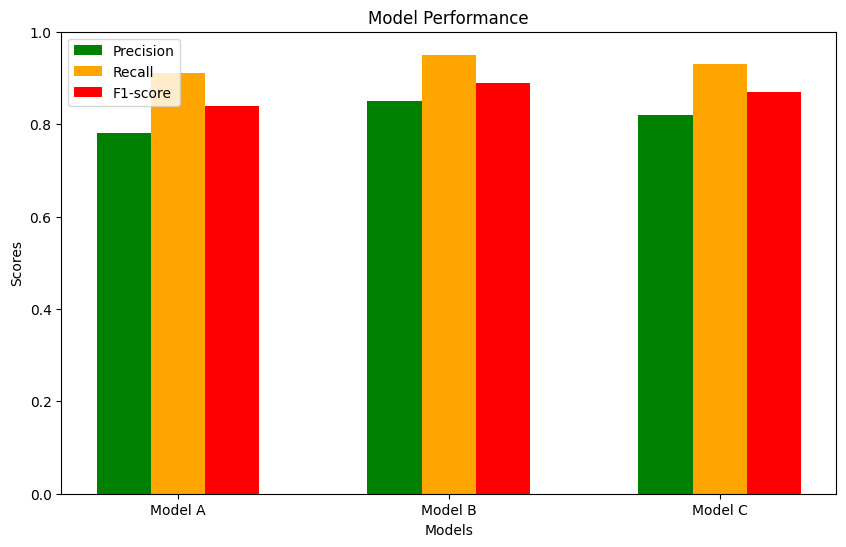

In [ ]:
# prompt: Visualization:
# Use visualization tools to present the performance of different models.

import matplotlib.pyplot as plt

# Sample data for different models (replace with your actual data)
models = ['Model A', 'Model B', 'Model C']
accuracy = [0.85, 0.92, 0.88]
precision = [0.78, 0.85, 0.82]
recall = [0.91, 0.95, 0.93]
f1 = [0.84, 0.89, 0.87]

# Create a bar chart for accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color='blue')
plt.title('Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Create a grouped bar chart for precision, recall, and F1-score
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = range(len(models))

plt.bar(x, precision, bar_width, label='Precision', color='green')
plt.bar([i + bar_width for i in x], recall, bar_width, label='Recall', color='orange')
plt.bar([i + 2 * bar_width for i in x], f1, bar_width, label='F1-score', color='red')

plt.xticks([i + bar_width for i in x], models)
plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.legend()
plt.show()
